In [1]:
import os
# Set environment variables to disable multithreading
# as users will probably want to set the number of cores
# to the max of their computer.
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

from autoencoders.ae import AutoEncoder
from anomaly.constants import GALAXY_LINES
from anomaly.utils import specobjid_to_idx
from sdss.metadata import MetaData
from sdss.utils.managefiles import FileDirectory

meta = MetaData()
# %matplotlib inline

# Data ingestion

In [25]:
data_dir = "/home/elom/spectra"
model_dir = "/home/elom/models"
bin_id = "bin_03"
explanations_dir = f"{model_dir}/{bin_id}/explanation"
paper_figures_dir = "/home/elom/phd/00_paper_explain-me-why/sections/figures"

In [16]:
def get_sdss_spec_img(
    specobjid, ra, dec, paper_dir, phd_dir
    ):
    """Download sdss image and spectrum"""

    meta.download_sdss_spectrum_image(
        specobjid=specobjid,
        save_to=paper_dir,
        image_format="jpeg",
    )

    meta.download_sdss_spectrum_image(
        specobjid=specobjid,
        save_to=phd_dir,
        image_format="jpeg",
    )

    ra, dec = meta_data_df[['ra', 'dec']].loc[specobjid].values

    meta.get_sdss_image(
        specobjid,
        coordinates= (ra, dec),
        save_to=paper_dir,
        image_format="jpeg",
    )

    meta.get_sdss_image(
        specobjid,
        coordinates= (ra, dec),
        save_to=phd_dir,
        image_format="jpeg",
    )


In [4]:
meta_data_df = pd.read_csv(
    f"{data_dir}/0_01_z_0_5_4_0_snr_inf.csv.gz",
    index_col="specobjid",
)

In [5]:
wave = np.load(f"{data_dir}/wave_spectra_imputed.npy")

spectra = np.load(
    f"{data_dir}/spectra_imputed.npy",
    mmap_mode="r"
)

idx_id = np.load(
    f"{data_dir}/{bin_id}/{bin_id}_index_specobjid.npy"
)

# Load model

In [6]:
ae_model = AutoEncoder(
    reload=True,
    reload_from=f"{model_dir}/{bin_id}",
)

# Overview of anomalies from MSE

## MSE_noRel100

<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_191182/883809698.py:35: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$\lambda$ [$\AA$]")
/tmp/ipykernel_191182/883809698.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Download sdss image and spectrum
paper_figures_dir: /home/elom/phd/00_paper_explain-me-why/sections/figures/overview_anomalies
phd_figures_dir: /home/elom/spectra/bin_03/mse_noRel100/sdss_images
http://skyserver.sdss.org/dr16/en/tools/explore/summary.aspx?sid=3240467000396376064&apid=


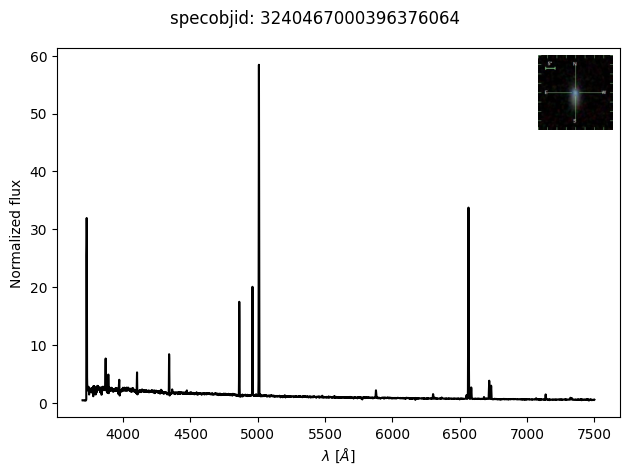

In [45]:
anomalies_dict = {
    'metric': 'mse_noRel100',
    'strong_emission':3240467000396376064,
    'artifact': 637325355518027776
}

specobjid = anomalies_dict["strong_emission"]
idx_spectrum = specobjid_to_idx(specobjid, idx_id)
spectrum = spectra[idx_spectrum]

print("Download sdss image and spectrum")

from_score = anomalies_dict["metric"]
save_for_paper_to = f"{paper_figures_dir}/overview_anomalies"
save_for_phd_to = f"{data_dir}/{bin_id}/{from_score}/sdss_images"
print(f"paper_figures_dir: {save_for_paper_to}")
print(f"phd_figures_dir: {save_for_phd_to}")

# ra, dec = meta_data_df[['ra', 'dec']].loc[specobjid].values

# get_sdss_spec_img(
#     specobjid=specobjid,
#     ra=ra, dec=dec,
#     paper_dir=save_for_paper_to,
#     phd_dir=save_for_phd_to
# )

fig, ax = plt.subplots(
    figsize=None,
)

ax.plot(wave, spectrum, c="black")
ax.set_ylabel("Normalized flux")

ax.set_xlabel("$\lambda$ [$\AA$]")
fig.suptitle(f"specobjid: {specobjid}")

image_name = f"image_{specobjid}.jpeg"
# Load the image
img = mpimg.imread(f"{save_for_paper_to}/{image_name}")

# Create inset in top-right corner of axs[0]
width_height_image = 0.75

axins = inset_axes(
    ax,
    width=width_height_image, height=width_height_image,
    bbox_to_anchor=(1, 1),
    bbox_transform=ax.transAxes,
    loc="upper right"
    )

# Show image in the inset
axins.imshow(img)
axins.axis('off')  # Hide axis around the image
fig.tight_layout()

fig.savefig(
    f"{save_for_paper_to}/{specobjid}_{from_score}.pdf"
)
fig.savefig(
    f"{save_for_phd_to}/{specobjid}_{from_score}.pdf"
)
print(meta.get_sky_server_url(specobjid))


<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_191182/1464624704.py:35: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$\lambda$ [$\AA$]")
/tmp/ipykernel_191182/1464624704.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Download sdss image and spectrum
paper_figures_dir: /home/elom/phd/00_paper_explain-me-why/sections/figures/overview_anomalies
phd_figures_dir: /home/elom/spectra/bin_03/mse_noRel100/sdss_images
http://skyserver.sdss.org/dr16/en/tools/explore/summary.aspx?sid=637325355518027776&apid=


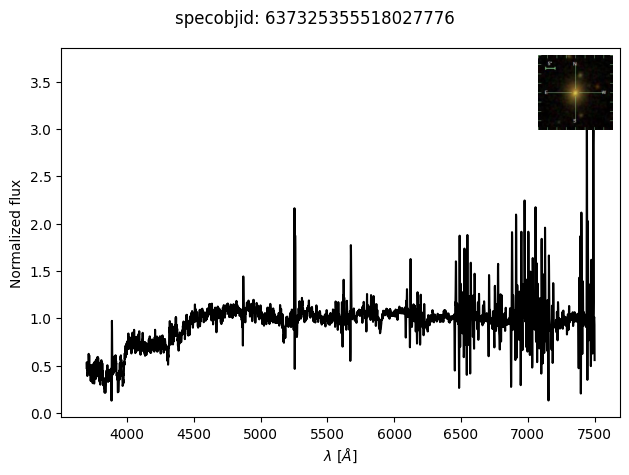

In [46]:
anomalies_dict = {
    'metric': 'mse_noRel100',
    'strong_emission':3240467000396376064,
    'artifact': 637325355518027776
}

specobjid = anomalies_dict["artifact"]
idx_spectrum = specobjid_to_idx(specobjid, idx_id)
spectrum = spectra[idx_spectrum]

print("Download sdss image and spectrum")

from_score = anomalies_dict["metric"]
save_for_paper_to = f"{paper_figures_dir}/overview_anomalies"
save_for_phd_to = f"{data_dir}/{bin_id}/{from_score}/sdss_images"
print(f"paper_figures_dir: {save_for_paper_to}")
print(f"phd_figures_dir: {save_for_phd_to}")

# ra, dec = meta_data_df[['ra', 'dec']].loc[specobjid].values

# get_sdss_spec_img(
#     specobjid=specobjid,
#     ra=ra, dec=dec,
#     paper_dir=save_for_paper_to,
#     phd_dir=save_for_phd_to
# )

fig, ax = plt.subplots(
    figsize=None,
)

ax.plot(wave, spectrum, c="black")
ax.set_ylabel("Normalized flux")

ax.set_xlabel("$\lambda$ [$\AA$]")
fig.suptitle(f"specobjid: {specobjid}")

image_name = f"image_{specobjid}.jpeg"
# Load the image
img = mpimg.imread(f"{save_for_paper_to}/{image_name}")

# Create inset in top-right corner of axs[0]
width_height_image = 0.75

axins = inset_axes(
    ax,
    width=width_height_image, height=width_height_image,
    bbox_to_anchor=(1, 1),
    bbox_transform=ax.transAxes,
    loc="upper right"
    )

# Show image in the inset
axins.imshow(img)
axins.axis('off')  # Hide axis around the image
fig.tight_layout()

fig.savefig(
    f"{save_for_paper_to}/{specobjid}_{from_score}.pdf"
)
fig.savefig(
    f"{save_for_phd_to}/{specobjid}_{from_score}.pdf"
)
print(meta.get_sky_server_url(specobjid))


## MSE_noREl97 

<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_191182/3858541763.py:35: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$\lambda$ [$\AA$]")
/tmp/ipykernel_191182/3858541763.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Download sdss image and spectrum
paper_figures_dir: /home/elom/phd/00_paper_explain-me-why/sections/figures/overview_anomalies
phd_figures_dir: /home/elom/spectra/bin_03/mse_noRel97/sdss_images
http://skyserver.sdss.org/dr16/en/tools/explore/summary.aspx?sid=531492683672217600&apid=


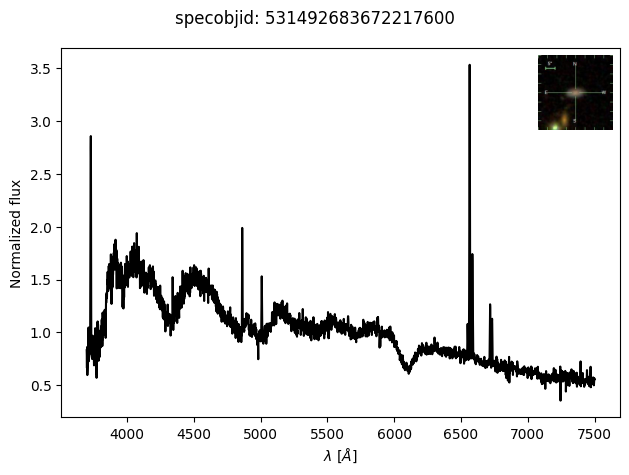

In [39]:
anomalies_dict = {
    'metric': 'mse_noRel97',
    'blue': 531492683672217600,
    'star': 1780176998165932032
}

specobjid = anomalies_dict["blue"]
idx_spectrum = specobjid_to_idx(specobjid, idx_id)
spectrum = spectra[idx_spectrum]

print("Download sdss image and spectrum")

from_score = anomalies_dict["metric"]
save_for_paper_to = f"{paper_figures_dir}/overview_anomalies"
save_for_phd_to = f"{data_dir}/{bin_id}/{from_score}/sdss_images"
print(f"paper_figures_dir: {save_for_paper_to}")
print(f"phd_figures_dir: {save_for_phd_to}")

# ra, dec = meta_data_df[['ra', 'dec']].loc[specobjid].values

# get_sdss_spec_img(
#     specobjid=specobjid,
#     ra=ra, dec=dec,
#     paper_dir=save_for_paper_to,
#     phd_dir=save_for_phd_to
# )

fig, ax = plt.subplots(
    figsize=None,
)

ax.plot(wave, spectrum, c="black")
ax.set_ylabel("Normalized flux")

ax.set_xlabel("$\lambda$ [$\AA$]")
fig.suptitle(f"specobjid: {specobjid}")

image_name = f"image_{specobjid}.jpeg"
# Load the image
img = mpimg.imread(f"{save_for_paper_to}/{image_name}")

# Create inset in top-right corner of axs[0]
width_height_image = 0.75

axins = inset_axes(
    ax,
    width=width_height_image, height=width_height_image,
    bbox_to_anchor=(1, 1),
    bbox_transform=ax.transAxes,
    loc="upper right"
    )

# Show image in the inset
axins.imshow(img)
axins.axis('off')  # Hide axis around the image
fig.tight_layout()

fig.savefig(
    f"{save_for_paper_to}/{specobjid}_{from_score}.pdf"
)
fig.savefig(
    f"{save_for_phd_to}/{specobjid}_{from_score}.pdf"
)
print(meta.get_sky_server_url(specobjid))


<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_191182/2854798742.py:35: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$\lambda$ [$\AA$]")


Download sdss image and spectrum
paper_figures_dir: /home/elom/phd/00_paper_explain-me-why/sections/figures/overview_anomalies
phd_figures_dir: /home/elom/spectra/bin_03/mse_noRel97/sdss_images


/tmp/ipykernel_191182/2854798742.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


http://skyserver.sdss.org/dr16/en/tools/explore/summary.aspx?sid=1780176998165932032&apid=


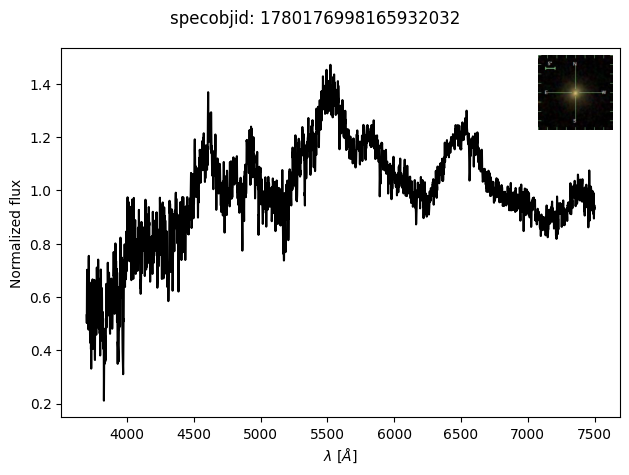

In [ ]:
anomalies_dict = {
    'metric': 'mse_noRel97',
    'blue': 531492683672217600,
    'star': 1780176998165932032
}

specobjid = anomalies_dict["star"]
idx_spectrum = specobjid_to_idx(specobjid, idx_id)
spectrum = spectra[idx_spectrum]

print("Download sdss image and spectrum")

from_score = anomalies_dict["metric"]
save_for_paper_to = f"{paper_figures_dir}/overview_anomalies"
save_for_phd_to = f"{data_dir}/{bin_id}/{from_score}/sdss_images"
print(f"paper_figures_dir: {save_for_paper_to}")
print(f"phd_figures_dir: {save_for_phd_to}")

# ra, dec = meta_data_df[['ra', 'dec']].loc[specobjid].values

# get_sdss_spec_img(
#     specobjid=specobjid,
#     ra=ra, dec=dec,
#     paper_dir=save_for_paper_to,
#     phd_dir=save_for_phd_to
# )

fig, ax = plt.subplots(
    figsize=None,
)

ax.plot(wave, spectrum, c="black")
ax.set_ylabel("Normalized flux")

ax.set_xlabel("$\lambda$ [$\AA$]")
fig.suptitle(f"specobjid: {specobjid}")

image_name = f"image_{specobjid}.jpeg"
# Load the image
img = mpimg.imread(f"{save_for_paper_to}/{image_name}")

# Create inset in top-right corner of axs[0]
width_height_image = 0.75

axins = inset_axes(
    ax,
    width=width_height_image, height=width_height_image,
    bbox_to_anchor=(1, 1),
    bbox_transform=ax.transAxes,
    loc="upper right"
    )

# Show image in the inset
axins.imshow(img)
axins.axis('off')  # Hide axis around the image
fig.tight_layout()

fig.savefig(
    f"{save_for_paper_to}/{specobjid}_{from_score}.pdf"
)
fig.savefig(
    f"{save_for_phd_to}/{specobjid}_{from_score}.pdf"
)
print(meta.get_sky_server_url(specobjid))


## mse_filter_250kms_noRel100

<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_191182/385798196.py:35: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$\lambda$ [$\AA$]")


Download sdss image and spectrum
paper_figures_dir: /home/elom/phd/00_paper_explain-me-why/sections/figures/overview_anomalies
phd_figures_dir: /home/elom/spectra/bin_03/mse_filter_250kms_noRel100/sdss_images


/tmp/ipykernel_191182/385798196.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


http://skyserver.sdss.org/dr16/en/tools/explore/summary.aspx?sid=1924292192684238848&apid=


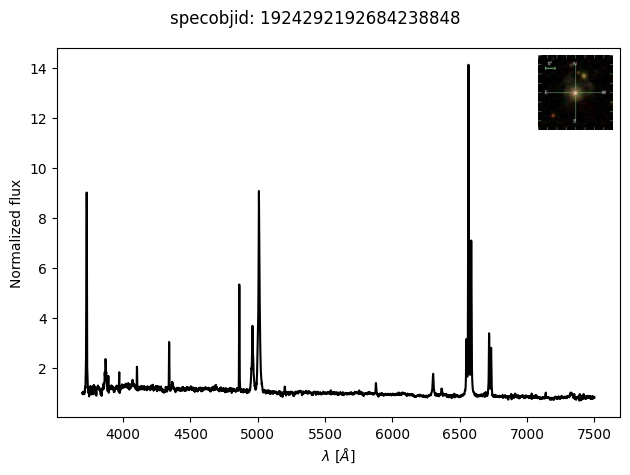

In [ ]:
anomalies_dict = {
    'metric': 'mse_filter_250kms_noRel100',
    'broad': 1924292192684238848,
    'artifact': 407686575611209728
}

specobjid = anomalies_dict["broad"]
idx_spectrum = specobjid_to_idx(specobjid, idx_id)
spectrum = spectra[idx_spectrum]

print("Download sdss image and spectrum")

from_score = anomalies_dict["metric"]
save_for_paper_to = f"{paper_figures_dir}/overview_anomalies"
save_for_phd_to = f"{data_dir}/{bin_id}/{from_score}/sdss_images"
print(f"paper_figures_dir: {save_for_paper_to}")
print(f"phd_figures_dir: {save_for_phd_to}")

# ra, dec = meta_data_df[['ra', 'dec']].loc[specobjid].values

# get_sdss_spec_img(
#     specobjid=specobjid,
#     ra=ra, dec=dec,
#     paper_dir=save_for_paper_to,
#     phd_dir=save_for_phd_to
# )

fig, ax = plt.subplots(
    figsize=None,
)

ax.plot(wave, spectrum, c="black")
ax.set_ylabel("Normalized flux")

ax.set_xlabel("$\lambda$ [$\AA$]")
fig.suptitle(f"specobjid: {specobjid}")

image_name = f"image_{specobjid}.jpeg"
# Load the image
img = mpimg.imread(f"{save_for_paper_to}/{image_name}")

# Create inset in top-right corner of axs[0]
width_height_image = 0.75

axins = inset_axes(
    ax,
    width=width_height_image, height=width_height_image,
    bbox_to_anchor=(1, 1),
    bbox_transform=ax.transAxes,
    loc="upper right"
    )

# Show image in the inset
axins.imshow(img)
axins.axis('off')  # Hide axis around the image
fig.tight_layout()

fig.savefig(
    f"{save_for_paper_to}/{specobjid}_{from_score}.pdf"
)
fig.savefig(
    f"{save_for_phd_to}/{specobjid}_{from_score}.pdf"
)
print(meta.get_sky_server_url(specobjid))


<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_191182/4161419007.py:35: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$\lambda$ [$\AA$]")


Download sdss image and spectrum
paper_figures_dir: /home/elom/phd/00_paper_explain-me-why/sections/figures/overview_anomalies
phd_figures_dir: /home/elom/spectra/bin_03/mse_filter_250kms_noRel100/sdss_images


/tmp/ipykernel_191182/4161419007.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


http://skyserver.sdss.org/dr16/en/tools/explore/summary.aspx?sid=407686575611209728&apid=


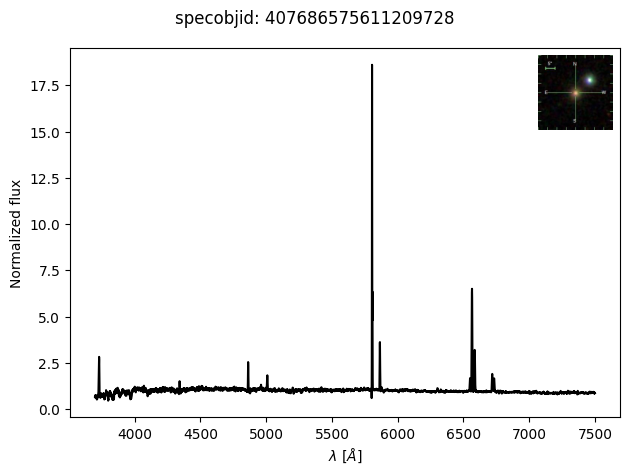

In [42]:
anomalies_dict = {
    'metric': 'mse_filter_250kms_noRel100',
    'broad': 1924292192684238848,
    'artifact': 407686575611209728
}

specobjid = anomalies_dict["artifact"]
idx_spectrum = specobjid_to_idx(specobjid, idx_id)
spectrum = spectra[idx_spectrum]

print("Download sdss image and spectrum")

from_score = anomalies_dict["metric"]
save_for_paper_to = f"{paper_figures_dir}/overview_anomalies"
save_for_phd_to = f"{data_dir}/{bin_id}/{from_score}/sdss_images"
print(f"paper_figures_dir: {save_for_paper_to}")
print(f"phd_figures_dir: {save_for_phd_to}")

ra, dec = meta_data_df[['ra', 'dec']].loc[specobjid].values

get_sdss_spec_img(
    specobjid=specobjid,
    ra=ra, dec=dec,
    paper_dir=save_for_paper_to,
    phd_dir=save_for_phd_to
)

fig, ax = plt.subplots(
    figsize=None,
)

ax.plot(wave, spectrum, c="black")
ax.set_ylabel("Normalized flux")

ax.set_xlabel("$\lambda$ [$\AA$]")
fig.suptitle(f"specobjid: {specobjid}")

image_name = f"image_{specobjid}.jpeg"
# Load the image
img = mpimg.imread(f"{save_for_paper_to}/{image_name}")

# Create inset in top-right corner of axs[0]
width_height_image = 0.75

axins = inset_axes(
    ax,
    width=width_height_image, height=width_height_image,
    bbox_to_anchor=(1, 1),
    bbox_transform=ax.transAxes,
    loc="upper right"
    )

# Show image in the inset
axins.imshow(img)
axins.axis('off')  # Hide axis around the image
fig.tight_layout()

fig.savefig(
    f"{save_for_paper_to}/{specobjid}_{from_score}.pdf"
)
fig.savefig(
    f"{save_for_phd_to}/{specobjid}_{from_score}.pdf"
)
print(meta.get_sky_server_url(specobjid))


## mse_filter_250kms_noRel97

<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_191182/813598423.py:35: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$\lambda$ [$\AA$]")


Download sdss image and spectrum
paper_figures_dir: /home/elom/phd/00_paper_explain-me-why/sections/figures/overview_anomalies
phd_figures_dir: /home/elom/spectra/bin_03/mse_filter_250kms_noRel97/sdss_images


/tmp/ipykernel_191182/813598423.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


http://skyserver.sdss.org/dr16/en/tools/explore/summary.aspx?sid=2501881598136313856&apid=


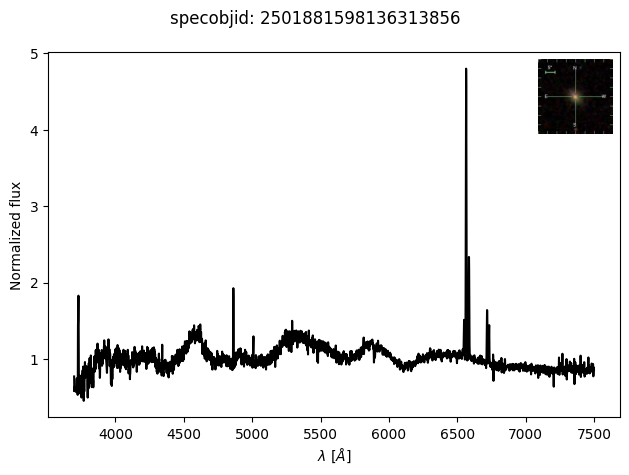

In [ ]:
anomalies_dict = {
    'metric': 'mse_filter_250kms_noRel97',
    'bumpy': 2501881598136313856,
    'halpha_bump': 2664004586678806528
}

specobjid = anomalies_dict["bumpy"]
idx_spectrum = specobjid_to_idx(specobjid, idx_id)
spectrum = spectra[idx_spectrum]

print("Download sdss image and spectrum")

from_score = anomalies_dict["metric"]
save_for_paper_to = f"{paper_figures_dir}/overview_anomalies"
save_for_phd_to = f"{data_dir}/{bin_id}/{from_score}/sdss_images"
print(f"paper_figures_dir: {save_for_paper_to}")
print(f"phd_figures_dir: {save_for_phd_to}")

# ra, dec = meta_data_df[['ra', 'dec']].loc[specobjid].values

# get_sdss_spec_img(
#     specobjid=specobjid,
#     ra=ra, dec=dec,
#     paper_dir=save_for_paper_to,
#     phd_dir=save_for_phd_to
# )

fig, ax = plt.subplots(
    figsize=None,
)

ax.plot(wave, spectrum, c="black")
ax.set_ylabel("Normalized flux")

ax.set_xlabel("$\lambda$ [$\AA$]")
fig.suptitle(f"specobjid: {specobjid}")

image_name = f"image_{specobjid}.jpeg"
# Load the image
img = mpimg.imread(f"{save_for_paper_to}/{image_name}")

# Create inset in top-right corner of axs[0]
width_height_image = 0.75

axins = inset_axes(
    ax,
    width=width_height_image, height=width_height_image,
    bbox_to_anchor=(1, 1),
    bbox_transform=ax.transAxes,
    loc="upper right"
    )

# Show image in the inset
axins.imshow(img)
axins.axis('off')  # Hide axis around the image
fig.tight_layout()

fig.savefig(
    f"{save_for_paper_to}/{specobjid}_{from_score}.pdf"
)
fig.savefig(
    f"{save_for_phd_to}/{specobjid}_{from_score}.pdf"
)
print(meta.get_sky_server_url(specobjid))


Download sdss image and spectrum
paper_figures_dir: /home/elom/phd/00_paper_explain-me-why/sections/figures/overview_anomalies
phd_figures_dir: /home/elom/spectra/bin_03/mse_filter_250kms_noRel97/sdss_images


<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_191182/667633260.py:35: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$\lambda$ [$\AA$]")
/tmp/ipykernel_191182/667633260.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


http://skyserver.sdss.org/dr16/en/tools/explore/summary.aspx?sid=2664004586678806528&apid=


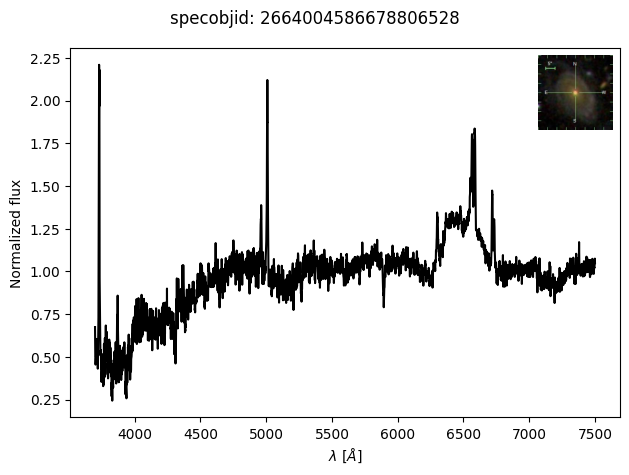

In [ ]:
anomalies_dict = {
    'metric': 'mse_filter_250kms_noRel97',
    'bumpy': 2501881598136313856,
    'halpha_bump': 2664004586678806528
}

specobjid = anomalies_dict["halpha_bump"]
idx_spectrum = specobjid_to_idx(specobjid, idx_id)
spectrum = spectra[idx_spectrum]

print("Download sdss image and spectrum")

from_score = anomalies_dict["metric"]
save_for_paper_to = f"{paper_figures_dir}/overview_anomalies"
save_for_phd_to = f"{data_dir}/{bin_id}/{from_score}/sdss_images"
print(f"paper_figures_dir: {save_for_paper_to}")
print(f"phd_figures_dir: {save_for_phd_to}")

# ra, dec = meta_data_df[['ra', 'dec']].loc[specobjid].values

# get_sdss_spec_img(
#     specobjid=specobjid,
#     ra=ra, dec=dec,
#     paper_dir=save_for_paper_to,
#     phd_dir=save_for_phd_to
# )

fig, ax = plt.subplots(
    figsize=None,
)

ax.plot(wave, spectrum, c="black")
ax.set_ylabel("Normalized flux")

ax.set_xlabel("$\lambda$ [$\AA$]")
fig.suptitle(f"specobjid: {specobjid}")

image_name = f"image_{specobjid}.jpeg"
# Load the image
img = mpimg.imread(f"{save_for_paper_to}/{image_name}")

# Create inset in top-right corner of axs[0]
width_height_image = 0.75

axins = inset_axes(
    ax,
    width=width_height_image, height=width_height_image,
    bbox_to_anchor=(1, 1),
    bbox_transform=ax.transAxes,
    loc="upper right"
    )

# Show image in the inset
axins.imshow(img)
axins.axis('off')  # Hide axis around the image
fig.tight_layout()

fig.savefig(
    f"{save_for_paper_to}/{specobjid}_{from_score}.pdf"
)
fig.savefig(
    f"{save_for_phd_to}/{specobjid}_{from_score}.pdf"
)
print(meta.get_sky_server_url(specobjid))


# Discriminative power of mse_noRel and variations

In [ ]:
scores_list = [
    'mse_filter_250kms_noRel100',
    'mse_filter_250kms_noRel97',
    'mse_filter_250kms_rel100',
    'mse_filter_250kms_rel97',
    'mse_noRel100',
    'mse_noRel97',
    'mse_rel100',
    'mse_rel97'
]

# Ignore

# Directories

In [3]:
vae_architecture = '256_128_64/latent_12'

project_dir = '/home/elom/onedrive/phd/spectra/0_01_z_0_5_4_0_snr_inf'
bin_id = 'bin_03'
explanations_dir = (
    f'{project_dir}/{bin_id}/explanation/{vae_architecture}'
)

scores_list = [
    'mse_filter_250kms_noRel100',
    'mse_filter_250kms_noRel97',
    'mse_filter_250kms_rel100',
    'mse_filter_250kms_rel97',
    'mse_noRel100',
    'mse_noRel97',
    'mse_rel100',
    'mse_rel97'
]

# Load data

In [4]:
# load data
wave = np.load(f"{project_dir}/wave_spectra_imputed.npy")

meta_data_df = pd.read_csv(
    f"{project_dir}/drop_0_01_z_0_5_4_0_snr_inf.csv.gz",
    index_col="specobjid",
)

spectra = np.load(
    f"{project_dir}/spectra_imputed.npy",
    mmap_mode="r"
)

idx_id = np.load(
    f"{project_dir}/{bin_id}/{bin_id}_index_specobjid.npy"
)

# load MSE score of most normal galaxies, AKA, best reconstructed ones
normal_mse_df = pd.read_csv(
    f"{explanations_dir}/mse_noRel100/top_normal.csv.gz",
    index_col="specobjid",
)

anomalous_mse_df = pd.read_csv(
    f"{explanations_dir}/mse_noRel100/top_anomalies.csv.gz",
    index_col="specobjid",
)

In [6]:
anomalies_scores_df_list = []
for score in scores_list:

    fpath = f"{explanations_dir}/{score}/top_anomalies.csv.gz"

    _df = pd.read_csv(fpath)
    _df["score"] = score
    anomalies_scores_df_list.append(_df)

anomalies_scores_df = pd.concat(
    anomalies_scores_df_list,
    ignore_index=True
    )

In [7]:
anomalies_scores_df.score.value_counts()

score
mse_filter_250kms_noRel100    10000
mse_filter_250kms_noRel97     10000
mse_filter_250kms_rel100      10000
mse_filter_250kms_rel97       10000
mse_noRel100                  10000
mse_noRel97                   10000
mse_rel100                    10000
mse_rel97                     10000
Name: count, dtype: int64

# mederic

In [3]:
data_dir = "/home/elom/spectra"
model_dir = "/home/elom/models"
bin_id = "bin_03"
explanations_dir = f"{model_dir}/{bin_id}/explanation"
paper_figures_dir = "/home/elom/phd/00_paper_explain-me-why/sections/figures/"
meta_data_df = pd.read_csv(
    f"{data_dir}/0_01_z_0_5_4_0_snr_inf.csv.gz",
    index_col="specobjid",
)
wave = np.load(f"{data_dir}/wave_spectra_imputed.npy")

spectra = np.load(
    f"{data_dir}/spectra_imputed.npy",
    mmap_mode="r"
)

idx_id = np.load(
    f"{data_dir}/{bin_id}/{bin_id}_index_specobjid.npy"
)

In [4]:
specobjid = 1780176998165932032
meta_data_df.loc[specobjid]

mjd                   53149
plate                  1581
fiberid                 470
run2d                    26
ra                235.10316
dec               32.865899
z                  0.053784
zErr               0.000019
zWarning                  0
class                GALAXY
subClass                NaN
z_noqso                   0
zErr_noqso                0
zWarning_noqso            0
targetType          SCIENCE
programname          legacy
instrument             SDSS
snMedian            21.8992
ABSSB             undefined
BROAD             undefined
ebv                0.028206
Name: 1780176998165932032, dtype: object